<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Item Recommendation for smart city users

## Context
The dataset is derived from a survey conducted to obtain a precise insight concerning the citizens' reactions to different recommendations of various items in two different contexts. The respondents were asked to choose among a set of 18 recommendations those that they would be most interested in if it were proposed in two different contexts: on a sunny and warm (20°C) Saturday afternoon in Spring (referred to as the "Sun" context) and on a rainy and cold (8°C) Saturday afternoon in Winter (referred to as the "Rain" context).

The recommendations concerned various subjects : social or cultural events, discounts in restaurants, useful city information, etc. and people were asked in each context which they would like to receive as push notifications on their phones. For each context, respondents could give several or no responses.

## Objective
We will try to build user profiles and build a classification based recommendation model that could allow future applications both to simulate recommendation system algorithms, and to deduce clusters from the collected profiles.

## Data Description

The "item_description.csv" file represents the list of items that can be recommended by a recommender system in a Smart City. 


File description:

- The first column is the itemId. For example: "15" 
- The second column is the item description. For example: "Political news for your city or state" 
- The last 8 columns represent (as a binary vector) the category to which the item belongs.

The 'item_ratings.csv' file represents user ratings for recommended items. 

File description:

- The first column is the contextId. For example: "1077". 
- The second column is the itemId. For example: "1". 
- The third column is the rating given by the user to the corresponding item. A value of "0" represents a refused recommendation / "1" means an accepted recommendation. 
- The fourth column is the userId. For example : "1". For each contextId 18 items are rated. For each contextId we keep the corresponding userId.

The "user_preferences.csv" file represents the user descriptions given with their features vector. 


File description:

- The first column is the contextId. For example: "1077" 
- The second column is the age. For example: "34". 
- The next two dimensions are the gender. Example : 1;0 means a man, and 0;1 means a woman. 
- The next 13 dimensions are the Socio-Professional Category (SPC) represented as a binary vector. 
- The next 13 dimensions represents the user's specialties with a binary vector. 
- The next 10 dimensions are the user preferences represented as a binary vector. 
- The next 8 dimensions represents the user's highest degree. 
- The next 2 dimensions identifies the weather/season context. Sun "1;0 and Rain "0;1". 
- The last column is the userId. For example: "1"

## Table of Content

1. Import Libraries

2. Read Data

3. Data Analysis and EDA

*   Item Description Data
*   Item Ratings item
*   Users Data

4. Data Preparation

5. Model building - Classification
6. Model building - Collaborative Filtering

7. Prediction and Recommendation

8. Conclusion and Interpretation

## 1. Import Libraries

In [88]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618260 sha256=ddda5c3cd308d123ba523322afc9961e761cf1132a5ce128cd84647368b3f634
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [10, 8]
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import math
import seaborn as sns


# set seed for reproducibility
np.random.seed(0)

## 2. Loading the Data
Read all the three files provided

In [4]:
import pandas as pd
df_items = pd.read_csv('/content/drive/MyDrive/item_description.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/item_ratings.csv')
df_users = pd.read_csv('/content/drive/MyDrive/user_preferences.csv')


## 3. Data Analysis and EDA

In [5]:
df_items.head()

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0


In [7]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   itemId    18 non-null     int64 
 1   itemDesc  18 non-null     object
 2   item1     18 non-null     int64 
 3   item2     18 non-null     int64 
 4   item3     18 non-null     int64 
 5   item4     18 non-null     int64 
 6   item5     18 non-null     int64 
 7   item6     18 non-null     int64 
 8   item7     18 non-null     int64 
 9   item8     18 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


In [8]:
df_items.shape

(18, 10)

In [9]:
df_users.head()

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1,2,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,2
2,3,43,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,3
3,4,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4
4,5,49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,5


### 3.1 Items Data

Q- Check the info of item_Description data an dwrite your comments

In [10]:
df_items.head()

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0


Q- Make a column called item category and add it to the items dataframe

In [11]:
df_items.iloc[:,2:]

,item1,item2,item3,item4,item5,item6,item7,item8
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0
9,0,0,0,0,0,1,0,0


In [12]:
df_items['cat'] = [1,1,2,2,3,4,5,5,4,6,6,7,7,6,8,8,8,7]
df_items

,itemId,itemDesc,item1,item2,item3,item4,item5,item6,item7,item8,cat
0,1,Various sports activities proposal,1,0,0,0,0,0,0,0,1
1,2,The results of your favorite sports team,1,0,0,0,0,0,0,0,1
2,3,A concert of your favorite band,0,1,0,0,0,0,0,0,2
3,4,A concert of a symphony orchestra,0,1,0,0,0,0,0,0,2
4,5,A discount for your favorite clothes store,0,0,1,0,0,0,0,0,3
5,6,A discount for your favorite bookshop,0,0,0,1,0,0,0,0,4
6,7,A discount for your favorite pub,0,0,0,0,1,0,0,0,5
7,8,A discount for your favorite restaurant,0,0,0,0,1,0,0,0,5
8,9,An exhibition about your favorite author,0,0,0,1,0,0,0,0,4
9,10,"The time of your next bus, tram, or subway (in...",0,0,0,0,0,1,0,0,6


### 3.2 Item Ratings Data

Q- Check info of the item_Ratings data and write your observations

In [13]:
df_ratings.head()

,contextId,itemId,rating,userId
0,1,1,1,1
1,1,2,1,1
2,1,3,0,1
3,1,4,0,1
4,1,5,0,1


In [14]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38736 entries, 0 to 38735
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   contextId  38736 non-null  int64
 1   itemId     38736 non-null  int64
 2   rating     38736 non-null  int64
 3   userId     38736 non-null  int64
dtypes: int64(4)
memory usage: 1.2 MB


In [15]:
df_ratings.shape

(38736, 4)

Q- Check the value counts of the rating column 

In [16]:
df_ratings['rating'].value_counts()

0    26653
1    12083
Name: rating, dtype: int64

Q- Make a column called context and add two weather (context) to it. Context =1 for contextId <1077 and Context=0 for contextId >1076

In [17]:
df_ratings['weather_context']  = df_ratings['contextId'].apply(lambda x: 1 if x < 1077 else 0)


In [18]:
df_ratings

,contextId,itemId,rating,userId,weather_context
0,1,1,1,1,1
1,1,2,1,1,1
2,1,3,0,1,1
3,1,4,0,1,1
4,1,5,0,1,1
...,...,...,...,...,...
38731,2152,14,0,1076,0
38732,2152,15,0,1076,0
38733,2152,16,0,1076,0
38734,2152,17,0,1076,0


Q- Check crosstab between context and rating and see if weather has any significant contribution

In [19]:
pd.crosstab(df_ratings['contextId'], df_ratings['weather_context'])

weather_context,0,1
contextId,,
1,0,18
2,0,18
3,0,18
4,0,18
5,0,18
...,...,...
2148,18,0
2149,18,0
2150,18,0


In [20]:
pd.crosstab(df_ratings['rating'], df_ratings['weather_context'])

weather_context,0,1
rating,,
0,13550,13103
1,5818,6265


Q- Check for null values

In [21]:
df_ratings.isnull().sum()

contextId          0
itemId             0
rating             0
userId             0
weather_context    0
dtype: int64

In [22]:
df_items.isnull().sum()

itemId      0
itemDesc    0
item1       0
item2       0
item3       0
item4       0
item5       0
item6       0
item7       0
item8       0
cat         0
dtype: int64

In [23]:
df_users.isnull().sum()

contextId           0
age                 0
man                 0
woman               0
SPC1                0
SPC2                0
SPC3                0
SPC4                0
SPC5                0
SPC6                0
SPC7                0
SPC8                0
SPC9                0
SPC10               0
SPC11               0
SPC12               0
SPC13               0
userSpecialty1      0
userSpecialty2      0
userSpecialty3      0
userSpecialty4      0
userSpecialty5      0
userSpecialty6      0
userSpecialty7      0
userSpecialty8      0
userSpecialty9      0
userSpecialty10     0
userSpecialty11     0
userSpecialty12     0
userSpecialty13     0
userPreference1     0
userPreference2     0
userPreference3     0
userPreference4     0
userPreference5     0
userPreference6     0
userPreference7     0
userPreference8     0
userPreference9     0
userPreference10    0
userHighDegree1     0
userHighDegree2     0
userHighDegree3     0
userHighDegree4     0
userHighDegree5     0
userHighDe

In [24]:
df_ratings.isna().sum()

contextId          0
itemId             0
rating             0
userId             0
weather_context    0
dtype: int64

In [25]:
df_users.isna().sum()

contextId           0
age                 0
man                 0
woman               0
SPC1                0
SPC2                0
SPC3                0
SPC4                0
SPC5                0
SPC6                0
SPC7                0
SPC8                0
SPC9                0
SPC10               0
SPC11               0
SPC12               0
SPC13               0
userSpecialty1      0
userSpecialty2      0
userSpecialty3      0
userSpecialty4      0
userSpecialty5      0
userSpecialty6      0
userSpecialty7      0
userSpecialty8      0
userSpecialty9      0
userSpecialty10     0
userSpecialty11     0
userSpecialty12     0
userSpecialty13     0
userPreference1     0
userPreference2     0
userPreference3     0
userPreference4     0
userPreference5     0
userPreference6     0
userPreference7     0
userPreference8     0
userPreference9     0
userPreference10    0
userHighDegree1     0
userHighDegree2     0
userHighDegree3     0
userHighDegree4     0
userHighDegree5     0
userHighDe

In [26]:
df_items.isna().sum()

itemId      0
itemDesc    0
item1       0
item2       0
item3       0
item4       0
item5       0
item6       0
item7       0
item8       0
cat         0
dtype: int64

Q- Check unique users, items, and contextId in the data

In [27]:
print("User:" ,df_ratings['userId'].nunique())
print("Item:" ,df_ratings['itemId'].nunique())
print("Rating:", df_ratings['rating'].nunique()) 

User: 1076
Item: 18
Rating: 2


### Popularity Based
Q- Check mean rating for each item and print the top 10 popular items

In [28]:
df_ratings.groupby('itemId').mean()['rating'].sort_values(ascending=False).head(10)

itemId
7     0.592472
10    0.559480
8     0.542286
11    0.428439
5     0.395911
3     0.368959
6     0.339219
13    0.332714
14    0.289498
12    0.276487
Name: rating, dtype: float64

Q- Report the most liked and least liked item

In [29]:
print("Most Liked: ",df_ratings.groupby('itemId')['rating'].mean().sort_values(ascending=False).head(1))
print("Least Liked: ",df_ratings.groupby('itemId')['rating'].mean().sort_values(ascending=True).head(1))


Most Liked:  itemId
7    0.592472
Name: rating, dtype: float64
Least Liked:  itemId
15    0.110595
Name: rating, dtype: float64


Q- Check the mean rating of each user and print top users (who have highest mean rating)

In [30]:
print("Most Liked: ",df_ratings.groupby('userId')['rating'].mean().sort_values(ascending=False).head(1))

Most Liked:  userId
266    1.0
Name: rating, dtype: float64


Q- Check distribution of mean rating

In [31]:
df_ratings.groupby('userId')['rating'].mean()

userId
1       0.388889
2       0.638889
3       0.250000
4       0.277778
5       0.277778
          ...   
1072    0.055556
1073    0.083333
1074    0.250000
1075    0.138889
1076    0.222222
Name: rating, Length: 1076, dtype: float64

In [32]:
import matplotlib.pyplot as plt

In [33]:
item_rating = pd.DataFrame(df_ratings.groupby('userId')['rating'].mean())

In [34]:
import seaborn as sns

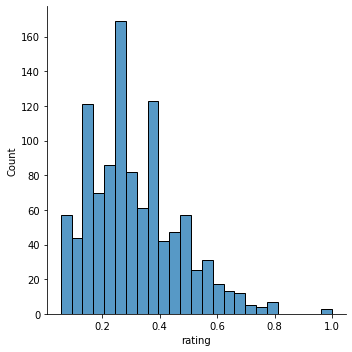

In [35]:
sns.displot(item_rating.rating)

Q- Add a column called item_cat having item category 

In [58]:
df_ratings

,itemId,rating,userId,weather_context
0,1,1,1,1
1,2,1,1,1
2,3,0,1,1
3,4,0,1,1
4,5,0,1,1
...,...,...,...,...
38731,14,0,1076,0
38732,15,0,1076,0
38733,16,0,1076,0
38734,17,0,1076,0


Q- Plot a boxplot between rating and item_cat

### 3.3 User Preferences Data

Q- Check info and shape of the user_preferences data

In [36]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   contextId         2152 non-null   int64
 1   age               2152 non-null   int64
 2   man               2152 non-null   int64
 3   woman             2152 non-null   int64
 4   SPC1              2152 non-null   int64
 5   SPC2              2152 non-null   int64
 6   SPC3              2152 non-null   int64
 7   SPC4              2152 non-null   int64
 8   SPC5              2152 non-null   int64
 9   SPC6              2152 non-null   int64
 10  SPC7              2152 non-null   int64
 11  SPC8              2152 non-null   int64
 12  SPC9              2152 non-null   int64
 13  SPC10             2152 non-null   int64
 14  SPC11             2152 non-null   int64
 15  SPC12             2152 non-null   int64
 16  SPC13             2152 non-null   int64
 17  userSpecialty1    2152 non-null  

In [37]:
df_users.shape

(2152, 51)

Q- Check the frequency distribution of "man" column

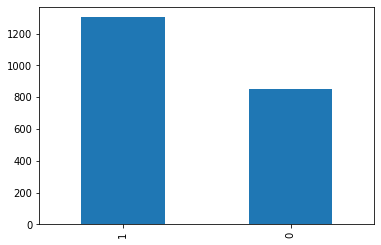

In [38]:
df_users['man'].value_counts().plot(kind='bar')

Q- Check the frequency distribution of "age" column

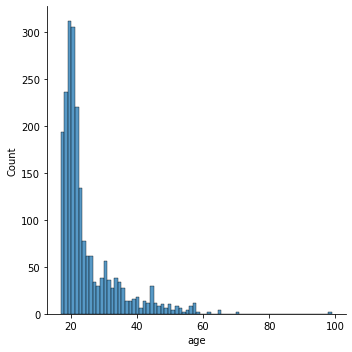

In [39]:
sns.displot(df_users['age'])

Q- Plot a boxplot between "man" and "age"

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


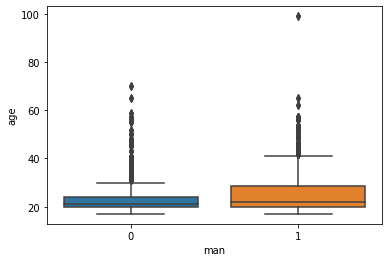

In [40]:
sns.boxplot(df_users['man'],df_users['age'])

Q- Drop redundant features like "woman", "contextId", "userId", 

*   List item
*   List item

"weatherSeason1"

In [41]:
users = df_users.drop(['woman', 'weatherSeason1', 'contextId', 'userId'], axis=1)

In [42]:
df_users.shape

(2152, 51)

In [43]:
users.shape

(2152, 47)

Q- Standardize the age column and keep the remaining column as it is

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 

column_trans = ColumnTransformer([('scaler', StandardScaler(),['age'])], remainder='passthrough') 
data = column_trans.fit_transform(users)


In [45]:
data = pd.DataFrame(data, columns= users.columns)
data.head()


,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason2
0,0.986618,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.762297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.996064,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.762297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.669029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Q- Replce the columns with the frequency of the value (0,1) instead of value for all the columns having binary values. Columns (age, man, weatherSeason2) remain as it is

In [46]:
for i in data.columns[2:-1]:
  freq = ((data.groupby(i).size())/len(data))
  data[i] = data[i].apply(lambda x:freq[x])

In [47]:
data.head()

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason2
0,0.986618,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
1,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.532528,0.593866,0.614312,0.610595,0.16171,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
2,1.996064,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.406134,0.385688,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
3,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.344796,0.795539,0.467472,0.406134,0.614312,0.389405,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
4,2.669029,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.077138,0.986989,0.082714,0.406134,0.344796,0.795539,0.467472,0.406134,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0


Q- Let's apply clustering to see if we can segment users into some clusters given their feature preferences.
Apply K-means clustering and plot an elbow plot to come up with an appropriate number of clusters

In [48]:
from sklearn.cluster import KMeans

In [49]:
wcss =[]
for i in range (1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

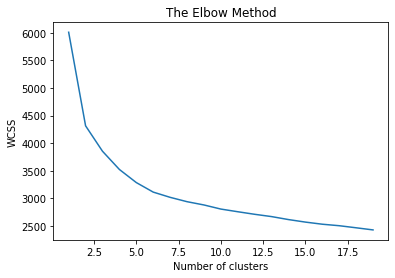

In [50]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Q- Check the silhouette score for a few clusters

In [51]:
from sklearn.metrics import silhouette_score

n_clusters = [4,5, 6,7,8,9, 10, 11, 12, 15,17]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))


For n_clusters = 4, silhouette score is 0.15522824241501837)
For n_clusters = 5, silhouette score is 0.14463956992614516)
For n_clusters = 6, silhouette score is 0.16807346508738433)
For n_clusters = 7, silhouette score is 0.16241574058690872)
For n_clusters = 8, silhouette score is 0.16220546729615243)
For n_clusters = 9, silhouette score is 0.15117540492122197)
For n_clusters = 10, silhouette score is 0.1532529994360831)
For n_clusters = 11, silhouette score is 0.15259893077787415)
For n_clusters = 12, silhouette score is 0.14103722252867665)
For n_clusters = 15, silhouette score is 0.1260833260489657)
For n_clusters = 17, silhouette score is 0.12798895919900205)


Q- Fir the cluster using the appropriate K

In [52]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=100)
kmeans = kmeans.fit(data)

Q- Add the cluster label to the original dataframe

In [53]:
df_users['cluster_value'] = kmeans.labels_

Q- Check for a few user if they belong to the same cluster or not

In [54]:
df_users.head(4)

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster_value
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
1,2,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,2,1
2,3,43,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,3,1
3,4,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1


## 4. Data Preparation

Let's merge the datasets into one dataframe now. Item data does not have any additional information.
We will merge item_rating and user_description.

Q- Drop contextID from the item_ratings

In [55]:
df_ratings = df_ratings.drop(['contextId'],axis=1)

In [56]:
df_ratings

,itemId,rating,userId,weather_context
0,1,1,1,1
1,2,1,1,1
2,3,0,1,1
3,4,0,1,1
4,5,0,1,1
...,...,...,...,...
38731,14,0,1076,0
38732,15,0,1076,0
38733,16,0,1076,0
38734,17,0,1076,0


Q- Drop columns like 'contextId', 'woman','weatherSeason1' or use the above processed dataframe

In [57]:
data

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason2
0,0.986618,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
1,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.795539,0.532528,0.593866,0.614312,0.610595,0.16171,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
2,1.996064,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.655204,0.795539,0.467472,0.406134,0.385688,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.249071,0.960037,0.980483,0.0
3,0.762297,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.162639,0.077138,0.986989,0.917286,0.593866,0.344796,0.795539,0.467472,0.406134,0.614312,0.389405,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
4,2.669029,1.0,0.312268,0.999071,0.062268,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.077138,0.986989,0.082714,0.406134,0.344796,0.795539,0.467472,0.406134,0.614312,0.610595,0.83829,0.286245,0.909851,0.997212,0.831784,0.818773,0.806691,0.854089,0.750929,0.039963,0.980483,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,-0.807953,1.0,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.369888,0.837361,0.922862,0.986989,0.917286,0.593866,0.344796,0.795539,0.467472,0.593866,0.614312,0.610595,0.83829,0.713755,0.909851,0.997212,0.168216,0.818773,0.806691,0.854089,0.750929,0.960037,0.980483,1.0
2148,-0.471471,0.0,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.035316,0.889405,0.979554,0.961896,0.630112,0.837361,0.922862,0.986989,0.917286,0.406134,0.655204,0.204461,0.467472,0.593866,0.385688,0.610595,0.83829,0.713755,0.909851,0.997212,0.831784,0.181227,0.806691,0.854089,0.750929,0.960037,0.980483,1.0
2149,-0.359310,0.0,0.687732,0.999071,0.937732,0.858736,1.0,0.982342,0.991636,0.990706,0.94145,0.998141,0.997212,0.992565,0.998141,0.761152,0.975836,0.94145,0.987918,0.964684,0.889405,0.979554,0.961896,0.630112,0.837361,0.077138,0.013011,0.917286,0.593866,0.655204,0.204461,0.532528,0.406134,0.385688,0.610595,0.83829,0.713755,0.909851,0.997212,0.831784,0.818773,0.193309

Let's make one dataframe having userId, itemId, itemCat, context/weather, user spcs, and user cluster label.

- We dont need df_items dataframe
- We will join df_ratings (context, itemId, userId, rating) and df_users (spc, cluster label)

Q- Merge ratings dataframe and user dataframe on userId

In [ ]:
user_df = df_users.drop(['contextId','woman','weatherSeason1','weatherSeason2'],axis=1)
user_unique = user_df.drop_duplicates()

In [81]:
item_cat = {1: 1,  2:1, 3: 2, 4:2, 5:3, 6:4, 7:5, 8:5, 9:4, 10:6, 11:6, 12:7, 13:7, 14:6, 15:8, 16:8, 17:8, 18:7 }
df_ratings['item_cat'] = df_ratings['itemId'].replace(item_cat)

In [82]:

df = pd.merge(df_ratings,user_unique,how='inner',on='userId')
df.shape

(38736, 52)

In [80]:
df_ratings

,itemId,rating,userId,weather_context
0,1,1,1,1
1,2,1,1,1
2,3,0,1,1
3,4,0,1,1
4,5,0,1,1
...,...,...,...,...
38731,14,0,1076,0
38732,15,0,1076,0
38733,16,0,1076,0
38734,17,0,1076,0


In [75]:
user_df.head()

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,userId,cluster_value
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1
1,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,2,1
2,43,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,3,1
3,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,4,1
4,49,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,5,1


In [76]:
df_users[df_users['userId']==1]

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster_value
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
1076,1077,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1


In [77]:
user_unique.head()

,age,man,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,userId,cluster_value
0,34,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1
1,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,2,1
2,43,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,3,1
3,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,4,1
4,49,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,5,1


In [78]:
user_unique.shape

(1076, 48)

In [69]:
df_users.head()

,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,userId,cluster_value
0,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
1,2,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,2,1
2,3,43,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,3,1
3,4,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1
4,5,49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,5,1


In [67]:
df_users.shape

(2152, 52)

In [64]:
df_ratings.shape

(38736, 4)

In [63]:
users_unique.shape

(2152, 52)

In [61]:
dff = pd.merge(df_ratings, user_unique, how = 'inner', on='userId')

In [62]:
dff.shape

(77472, 55)

Q- Make X and y data. Keep rating in y.
Drop Ids and ratings from X data

In [107]:
dff.head()

,itemId,rating,userId,weather_context,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,cluster_value
0,1,1,1,1,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1,1,1,1,1,1077,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
2,2,1,1,1,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,2,1,1,1,1077,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
4,3,0,1,1,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [109]:
X = dff.drop(['itemId', 'userId', 'contextId', 'rating'], axis=1)

In [110]:
y = dff['rating']

## 5. Model Building - Classification

Q- Split X and y into train and test set

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

Q- Apply any classifier (we will use deicion tree here)

In [114]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

Q- Check accuracy, recall, and confusion matrix

In [116]:
y_pred = model.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.6876344548661906

In [118]:
confusion_matrix(y_test, y_pred)

array([[14473,  1555],
       [ 5705,  1509]])

## 6. Model Building - Collaborative Filtering

Q- Make a dataframe having userId, itemId, and rating

In [90]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [94]:
dff.head()

,itemId,rating,userId,weather_context,contextId,age,man,woman,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6,SPC7,SPC8,SPC9,SPC10,SPC11,SPC12,SPC13,userSpecialty1,userSpecialty2,userSpecialty3,userSpecialty4,userSpecialty5,userSpecialty6,userSpecialty7,userSpecialty8,userSpecialty9,userSpecialty10,userSpecialty11,userSpecialty12,userSpecialty13,userPreference1,userPreference2,userPreference3,userPreference4,userPreference5,userPreference6,userPreference7,userPreference8,userPreference9,userPreference10,userHighDegree1,userHighDegree2,userHighDegree3,userHighDegree4,userHighDegree5,userHighDegree6,userHighDegree7,userHighDegree8,weatherSeason1,weatherSeason2,cluster_value
0,1,1,1,1,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1,1,1,1,1,1077,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
2,2,1,1,1,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,2,1,1,1,1077,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
4,3,0,1,1,1,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [128]:
reader = Reader(rating_scale=(0,1))
data = Dataset.load_from_df(df_final[['userId','itemId','rating']], reader)

In [129]:
trainset, testset, = train_test_split(data, test_size=.3, random_state=123)

Q- Convert it into surprise datatype and split it into train and test and apply SVD model

In [130]:
svd_model = SVD(n_factors=50, biased=False)
svd_model.fit(trainset)
test_pred = svd_model.test(testset)

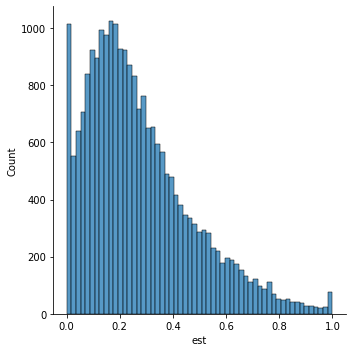

In [131]:
pred_df = pd.DataFrame(test_pred)
sns.displot(pred_df['est'])

Q- Make the prediction on test data and report rmse, mae, fcp

In [132]:
accuracy.rmse(test_pred)

RMSE: 0.3960


0.39600528553238

In [133]:
accuracy.mae(test_pred)

MAE:  0.3165


0.3164883183124354

In [134]:
accuracy.fcp(test_pred)

FCP:  0.7734


0.7734457206217441

In [138]:
from surprise.model_selection import cross_validate, train_test_split
from surprise import SVD, Dataset, Reader, KNNWithMeans
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(k=20)]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,0.320381,6.389119,37.656153
SVD,0.367579,3.526196,0.126834


## 7. Prediction and Recommendation

Q- Write a function to recommend top n items and recommend top 10 items to test users

In [136]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [140]:
top_n = get_top_n(test_pred, n=100)

for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, _) in user_ratings])

881 [7, 7, 10, 10, 13, 8, 8, 3, 3, 6, 6, 14, 16, 17, 17, 11, 11, 4, 15, 9, 9, 18, 2, 2]
700 [3, 7, 7, 14, 13, 12, 12, 5, 11, 11, 11, 16, 17, 17, 17, 1, 1, 15, 15, 4, 8, 8, 18, 9]
798 [7, 10, 10, 10, 5, 11, 3, 2, 1, 1, 1, 16, 14, 14, 13, 9, 17, 17, 18, 15, 15, 4, 4, 4, 4, 12]
660 [10, 11, 8, 8, 13, 17, 17, 17, 17, 6, 5, 5, 5, 12, 12, 12, 12, 3, 3, 16, 16, 1, 9, 9, 2, 4]
694 [7, 7, 8, 10, 10, 11, 11, 11, 5, 5, 5, 3, 13, 13, 13, 1, 1, 14, 12, 18, 17, 17, 16, 16, 16, 9, 4, 4, 4, 15]
31 [3, 3, 11, 11, 18, 18, 10, 10, 4, 13, 7, 7, 7, 12, 12, 14, 16, 16, 16, 16, 8, 8, 9, 9, 2, 5, 5, 17, 17, 6]
876 [7, 7, 8, 3, 13, 12, 12, 12, 10, 10, 11, 14, 14, 4, 9, 1, 17, 17, 18, 15, 15]
751 [8, 7, 7, 7, 3, 5, 5, 5, 10, 12, 11, 11, 13, 6, 6, 6, 4, 18, 1, 1, 14, 14, 14, 17, 2, 16, 9, 15]
152 [8, 7, 7, 7, 7, 5, 6, 11, 10, 10, 13, 3, 12, 12, 12, 14, 14, 1, 1, 16, 17, 4, 15]
127 [8, 8, 5, 7, 7, 12, 12, 3, 13, 13, 1, 17, 6, 18, 18, 11, 11, 10, 2, 2, 16, 9, 14, 14, 15, 15, 15]
665 [13, 10, 10, 6, 6, 11, 11, 3, 3

## 8. Conclusion and Interpretation

A Simple classification model is not performing well becoz we do not item 
features and user features are not that diff to each


User Item is not being accounted in the simple classification probelm


Surprise does not provide a model to build a classification model and we used SVD model


Here, we already have ratimgs of all users for all the items, However, the SVD model can be siimulated the ratings when there is a new users. 



we have recommended 10 ten items to a user based on their likeness for an item

